In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [2]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'header': 8}

In [3]:
df = pd.read_csv('../input/ICEFacilityListReport.csv.gz', **read_csv_opts)

In [4]:
df.head()

,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
0,ABRDNWA,ABERDEEN CITY JAIL,210 EAST MARKET ST,ABERDEEN,GRAYS HARBOR,WA,98520,9,SEA,SEA,...,No,NaN,0,400,0%,0,0,0%,0,0
1,ABTHOLD,ABILENE HOLD ROOM,12071 FM 3522,ABILENE,ABILENE,TX,79601,5,DAL,ABT,...,No,NaN,0,400,0%,0,0,0%,0,0
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,1000 ACADEMY DRIVE,MORGANTOWN,BERKS,PA,19543,3,PHI,BRK,...,No,NaN,35,400,9%,800,372,102%,"1,207",5
3,RICRANS,"ACI (CRANSTON, RHODE ISLAND)",39 HOWARD AVE,CRANSTON,PROVIDENCE,RI,02920,1,BOS,BOS,...,No,NaN,0,400,0%,0,0,0%,0,0
4,ADACOID,ADA COUNTY JAIL,7210 BARRISTER DRIVE,BOISE,ADA,ID,83704,9,SLC,HEL,...,No,NaN,0,400,0%,0,0,0%,0,0


In [5]:
df.columns

Index(['DETLOC', 'Name', 'Address', 'City', 'County', 'State', 'Zip',
       'Circuit', 'AOR', 'Docket',
       ...
       'DSM Assigned?', 'DSM Assignment Type', 'FY18 Calendar Days in Use',
       'FY18 Possible Days', 'FY18 % of Days in Use', 'FY18 Total Mandays',
       'FY17 Calendar Days in Use', 'FY17 % of Days in Use',
       'FY17 Total Mandays', 'FY17 Max Pop Count'],
      dtype='object', length=135)

In [6]:
levels_to_clean = ['ADP - Monthly',
          'ADP: Criminality',
          'ADP: Fiscal Year',
          'ADP: Initial Bookins',
          'Capacity',
          'FY18 ADP: Criminality and Gender',
          'FY18 ADP: Detainee Classification Level',
          'FY18 ADP: ICE Threat Level',
          'FY18 ADP: Mandatory Detention',
          'Facility Average Length of Stay',
          'Facility Bookins',
          'Facility Information',
          'Facility Statistics - FY 2017',
          'Facility Statistics - FY 2018',
          'Initial Bookins',
          'Population']

In [7]:
# # Need to check this doesn't cause issues, make smarter
# for level in levels_to_clean:
#     for col in df.loc[:, level]:
#         try:
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].astype(str)
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace(',','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace('$','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace('%','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].astype(int)
#         except ValueError:
#             pass

for col in df.columns:
    try:
        df.loc[:, col] = df.loc[:, col].astype(str)
        df.loc[:, col] = df.loc[:, col].str.replace(',','')
        df.loc[:, col] = df.loc[:, col].str.replace('$','')
        df.loc[:, col] = df.loc[:, col].str.replace('%','')
        df.loc[:, col] = df.loc[:, col].astype(int)
    except ValueError:
        pass

In [8]:
# adp = []

# for col in df.columns: adp.append('ADP' in col)

In [9]:
adp = ['FY18 ADP',
       'FY17 ADP',
       'FY16 ADP',
       'FY15 ADP',
       'FY14 ADP',
       'FY13 ADP',
       'FY12 ADP',
       'FY11 ADP',
       'FY10 ADP',
       'FY09 ADP']

In [10]:
adp_dict = df.set_index('DETLOC').loc[:, adp].to_dict('index')

In [11]:
with open('../output/adp_dict.yaml', 'w') as file:
    yaml.dump(adp_dict, file, default_flow_style=False)

In [12]:
df.groupby(['AOR'])['Population Count'].sum().sort_values(ascending=False)

AOR
SNA    8817
PHO    3972
ATL    3480
HOU    2873
LOS    2759
ELP    2685
NOL    2493
MIA    2030
NYC    1795
SND    1736
CHI    1624
SEA    1562
DAL    1137
DET    1104
PHI    1079
SFR    1060
NEW    1025
WAS     865
SPM     812
BOS     788
DEN     651
BUF     617
SLC     472
BAL     355
Name: Population Count, dtype: int64

In [13]:
list(df.columns)

['DETLOC',
 'Name',
 'Address',
 'City',
 'County',
 'State',
 'Zip',
 'Circuit',
 'AOR',
 'Docket',
 'Type',
 'Type Detailed',
 'ICE Funded',
 'Male/Female',
 'Levels A,B,C,D',
 'Capacity',
 'Current FY Utilization',
 'Population Count',
 'Date of Last Use',
 'Date of First Use',
 'FY18 Max Population Count',
 'FY18 ADP',
 'FY17 ADP',
 'FY16 ADP',
 'FY15 ADP',
 'FY14 ADP',
 'FY13 ADP',
 'FY12 ADP',
 'FY11 ADP',
 'FY10 ADP',
 'FY09 ADP',
 'November 2016',
 'December 2016',
 'January 2017',
 'February 2017',
 'March 2017',
 'April 2017',
 'May 2017',
 'June 2017',
 'July 2017',
 'August 2017',
 'September 2017',
 'October 2017',
 'November 2017',
 'FY18 ALOS',
 'FY17 ALOS',
 'FY16 ALOS',
 'FY15 ALOS',
 'FY18 Facility Bookins',
 'FY17 Facility Bookins',
 'FY16 Facility Bookins',
 'FY15 Facility Bookins',
 'FY18 Initial Bookins',
 'FY17 Initial Bookins',
 'FY16 Initial Bookins',
 'FY15 Initial Bookins',
 'FY18 Initial Bookin ADP',
 'FY17 Initial Bookin ADP',
 'FY16 Initial Bookin ADP',
 '

In [14]:
ADP_by_FY = ['FY18 ADP',
             'FY17 ADP',
             'FY16 ADP',
             'FY15 ADP',
             'FY14 ADP',
             'FY13 ADP',
             'FY12 ADP',
             'FY11 ADP',
             'FY10 ADP',
             'FY09 ADP']

In [15]:
temp = df.groupby(['AOR'])[ADP_by_FY].sum()

In [16]:
temp = temp[temp.columns.sort_values()]

In [17]:
temp = temp.T

In [27]:
temp.to_csv('../output/facility_adp_by_fy.csv')

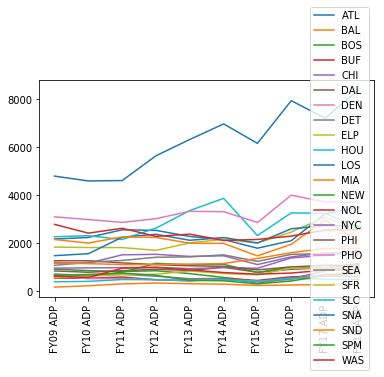

In [25]:
plt.plot(temp)
plt.xticks(rotation=90)
plt.legend(temp, loc=5)
plt.show();